In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import sys
sys.path.append('../../../')
sys.path.append('../../../../FedLab/')

# import fedlab_benchmarks
# from fedlab_benchmarks.datasets import RCV1

from fedlab.utils.dataset import FMNISTPartitioner
from fedlab.utils.functional import partition_report, save_dict

import torch
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST

# Load Data

In [5]:
root = "../../../../data/FMNIST"
trainset = FashionMNIST(root=root, train=True, download=True)

# Data Partition

In [7]:
num_classes = 10
num_clients = 10
seed = 2021

col_names = [f"class{i}" for i in range(num_classes)]

hist_color = '#4169E1'
plt.rcParams['figure.facecolor'] = 'white'

## Label Distribution Skew
### Quantity-based

1. When \#C=1:

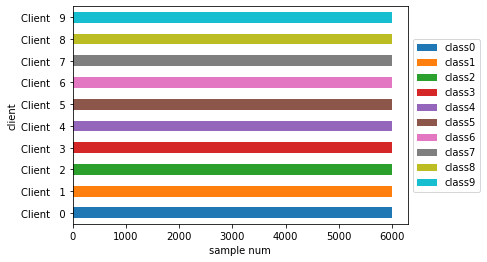

In [8]:
# perform partition
noniid_major_label_part = FMNISTPartitioner(trainset.targets, 
                                           num_clients=num_clients,
                                           partition="noniid-#label", 
                                           major_classes_num=1,
                                           seed=seed)

# generate partition report
csv_file = "../partition-reports/fmnist_noniid-label_1_clients_10.csv"
partition_report(trainset.targets, noniid_major_label_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

noniid_major_label_part_df = pd.read_csv(csv_file,header=1)
noniid_major_label_part_df = noniid_major_label_part_df.set_index('client')
for col in col_names:
    noniid_major_label_part_df[col] = (noniid_major_label_part_df[col] * noniid_major_label_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
noniid_major_label_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"../imgs/fmnist_noniid-label_1_clients_10.png", 
            dpi=400, bbox_inches = 'tight')

2. \#C=2

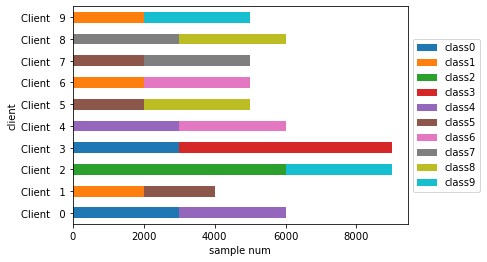

In [9]:
# perform partition
noniid_major_label_part = FMNISTPartitioner(trainset.targets, 
                                           num_clients=num_clients,
                                           partition="noniid-#label", 
                                           major_classes_num=2,
                                           seed=seed)

# generate partition report
csv_file = "../partition-reports/fmnist_noniid-label_2_clients_10.csv"
partition_report(trainset.targets, noniid_major_label_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

noniid_major_label_part_df = pd.read_csv(csv_file,header=1)
noniid_major_label_part_df = noniid_major_label_part_df.set_index('client')
for col in col_names:
    noniid_major_label_part_df[col] = (noniid_major_label_part_df[col] * noniid_major_label_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
noniid_major_label_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"../imgs/fmnist_noniid-label_2_clients_10.png", 
            dpi=400, bbox_inches = 'tight')

3. \#C=3

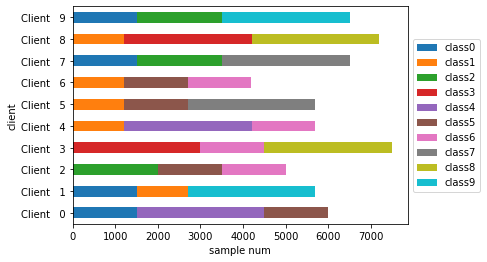

In [10]:
# perform partition
noniid_major_label_part = FMNISTPartitioner(trainset.targets, 
                                           num_clients=num_clients,
                                           partition="noniid-#label", 
                                           major_classes_num=3,
                                           seed=seed)

# generate partition report
csv_file = "../partition-reports/fmnist_noniid-label_3_clients_10.csv"
partition_report(trainset.targets, noniid_major_label_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

noniid_major_label_part_df = pd.read_csv(csv_file,header=1)
noniid_major_label_part_df = noniid_major_label_part_df.set_index('client')
for col in col_names:
    noniid_major_label_part_df[col] = (noniid_major_label_part_df[col] * noniid_major_label_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
noniid_major_label_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"../imgs/fmnist_noniid-label_3_clients_10.png", 
            dpi=400, bbox_inches = 'tight')

### Distribution-based (Dirichlet)

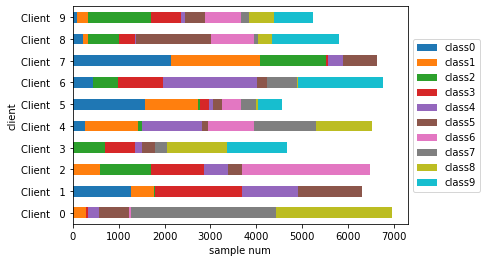

In [11]:
# perform partition
noniid_labeldir_part = FMNISTPartitioner(trainset.targets, 
                                        num_clients=num_clients,
                                        partition="noniid-labeldir", 
                                        dir_alpha=0.5,
                                        seed=seed)

# generate partition report
csv_file = "../partition-reports/fmnist_noniid_labeldir_clients_10.csv"
partition_report(trainset.targets, noniid_labeldir_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

noniid_labeldir_part_df = pd.read_csv(csv_file,header=1)
noniid_labeldir_part_df = noniid_labeldir_part_df.set_index('client')
for col in col_names:
    noniid_labeldir_part_df[col] = (noniid_labeldir_part_df[col] * noniid_labeldir_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
noniid_labeldir_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"../imgs/fmnist_noniid_labeldir_clients_10.png", 
            dpi=400, bbox_inches = 'tight')

## Feature Distribution Skew
### Noise-based

### Synthetic

FMNIST does not support "feature distribution skew"-"synthetic" partition.

### Real

FMNIST does not support "feature distribution skew"-"real" partition.

## Quantity Skew (Dirichlet)

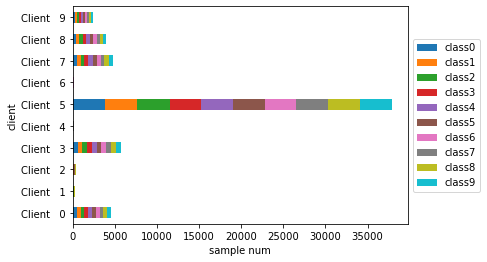

In [12]:
# perform partition
unbalance_part = FMNISTPartitioner(trainset.targets, 
                                  num_clients=num_clients,
                                  partition="unbalance", 
                                  dir_alpha=0.5,
                                  seed=seed)

# generate partition report
csv_file = "../partition-reports/fmnist_unbalance_clients_10.csv"
partition_report(trainset.targets, unbalance_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

unbalance_part_df = pd.read_csv(csv_file,header=1)
unbalance_part_df = unbalance_part_df.set_index('client')
for col in col_names:
    unbalance_part_df[col] = (unbalance_part_df[col] * unbalance_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
unbalance_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"../imgs/fmnist_unbalance_clients_10.png", 
            dpi=400, bbox_inches = 'tight')

## IID

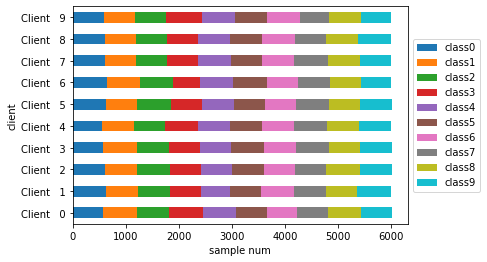

In [13]:
# perform partition
iid_part = FMNISTPartitioner(trainset.targets, 
                            num_clients=num_clients,
                            partition="iid",
                            seed=seed)

# generate partition report
csv_file = "../partition-reports/fmnist_iid_clients_10.csv"
partition_report(trainset.targets, iid_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

iid_part_df = pd.read_csv(csv_file,header=1)
iid_part_df = iid_part_df.set_index('client')
for col in col_names:
    iid_part_df[col] = (iid_part_df[col] * iid_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
iid_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"../imgs/fmnist_iid_clients_10.png", 
            dpi=400, bbox_inches = 'tight')